In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tempmatch as tm
from obspy import UTCDateTime as UTC
from obspy.signal import filter
import obspy

In [2]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv

In [3]:
df = pd.DataFrame()
for f in detectfiles:
    try:
        df = pd.concat([df, pd.read_csv(f)])
    except:
        pass

In [4]:
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(by='time')
df['ones'] = 1
df.set_index('time', inplace=True)
df['day_of_year'] = [x.dayofyear for x in df.index]
df['year'] = [x.year for x in df.index]

Text(0, 0.5, 'cumulative number of events')

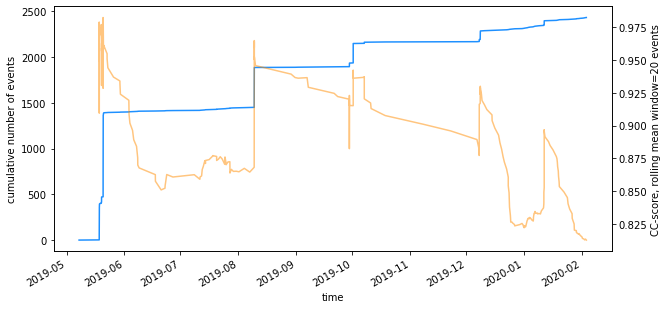

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
df.cumsum()['ones'].plot(ax=ax, color='dodgerblue')

ax2 = ax.twinx()
df.similarity.rolling(window=20).mean().plot(ax=ax2, color='darkorange', alpha=0.5)
ax2.set_ylabel('CC-score, rolling mean window=20 events')
# ax.set_yscale('log')
ax.set_ylabel('cumulative number of events')


# ax.plot

In [6]:
df.sample(10)

,similarity,template_id,ones,day_of_year,year
time,,,,,
2019-05-20 14:03:08.770000+00:00,0.974940,0,1,140,2019
2019-05-20 13:52:49.166000+00:00,0.875521,0,1,140,2019
2019-07-20 09:03:38.042000+00:00,0.865772,0,1,201,2019
2019-08-09 13:10:57.823000+00:00,0.962857,0,1,221,2019
2019-05-20 14:16:12.817000+00:00,0.989537,0,1,140,2019
2019-05-20 13:54:20.999000+00:00,0.946857,0,1,140,2019
2019-05-20 13:54:29.925000+00:00,0.964388,0,1,140,2019
2019-05-20 13:53:07.283000+00:00,0.979288,0,1,140,2019
2019-05-18 13:37:27.238000+00:00,0.990502,0,1,138,2019


In [7]:
df.index[0].year

2019

In [8]:
UTC(df.index[0])

2019-05-07T16:37:35.302001Z

In [30]:
def get_raw_data_for_event(event):
    ts = event.index[0]
    year = ts.year
    day = ts.day_of_year
    ts = UTC(ts)
    if year == 2020:
        day = '0'+str(day)
    dirstr = '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.{y}.{d}'.format(y=year, d=day)
    data = obspy.read(dirstr)
    data.trim(starttime=ts, endtime=ts+0.25)
    return data

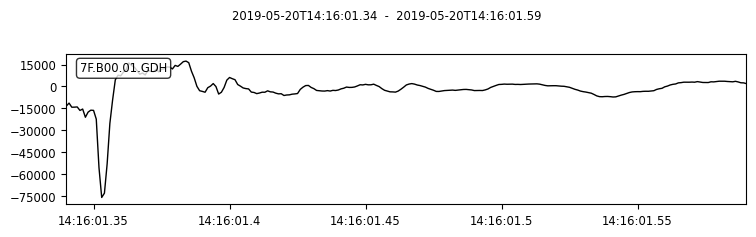

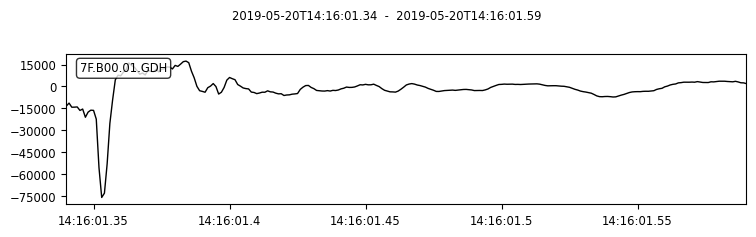

In [31]:
get_raw_data_for_event(df.sample()).plot()

In [32]:
# samples = df.sample(10)
# samples

In [53]:
for s in np.arange(0, 10, 1):
    e = df.sample()
    data = get_raw_data_for_event(e)
    times = data[0].times()
    d = data[0].data
    writeable_df = pd.DataFrame({'data':d,'times':times})
    starttime = str(e.index[0]).split('+')[0]
    writeable_df.to_csv('events_for_rob/'+starttime+'.csv', index=False)

In [50]:
str(df.sample().index[0]).split('+')[0]

'2019-05-18 12:09:00.511000'